In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
##Balancing DataSet

In [8]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class'] == 1]

In [9]:
non_fraud.shape , fraud.shape

((284315, 31), (492, 31))

In [10]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [11]:
data = fraud._append(non_fraud , ignore_index = True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,85103.0,-1.119139,-1.319172,2.712763,0.373307,0.187604,-0.535688,-1.075116,0.327021,1.930100,...,0.048742,0.336264,0.150366,0.396191,-0.773697,0.312911,-0.010505,-0.009958,3.00,0
980,80064.0,0.959940,-1.411583,1.414146,-1.654882,-1.643859,1.083356,-1.516207,0.638181,3.375127,...,0.245154,1.308258,-0.226581,-0.185593,0.557153,-0.459865,0.179636,0.029354,60.49,0
981,58270.0,-1.357250,0.032231,1.720698,0.501374,0.994244,-1.075166,0.672932,-0.067857,-0.386332,...,0.060612,-0.025464,-0.033170,0.388344,0.554065,-0.504343,0.030794,0.116526,64.55,0
982,124091.0,2.030364,-0.853859,-2.790614,-0.878696,0.392206,-1.346515,0.697812,-0.697889,-1.185843,...,0.558700,1.361286,-0.360947,0.707319,0.781176,0.257982,-0.124234,-0.060075,163.00,0


In [12]:
data['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [13]:
x = data.drop('Class' , axis = 1)
y = data['Class']

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0 , stratify = y) 

In [15]:
x_train.shape , x_test.shape

((787, 30), (197, 30))

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [17]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [18]:
x_train.shape

(787, 30)

In [19]:
x_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [20]:
x_train.shape , x_test.shape

((787, 30, 1), (197, 30, 1))

CNN

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D , MaxPool1D


In [22]:
epochs = 50
model = Sequential()
model.add(Conv1D(32,2,activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 29, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [24]:
from tensorflow.keras.optimizers import Adam

In [25]:
model.compile(optimizer = Adam(lr = 0.0001), loss = 'binary_crossentropy' , metrics=['accuracy'])

In [26]:
history = model.fit(x_train , y_train , epochs = epochs , validation_data = (x_test , y_test) , verbose = 1)

Epoch 1/50
25/25 [==============================] - 1s 13ms/step - loss: 0.3930 - accuracy: 0.8615 - val_loss: 0.4882 - val_accuracy: 0.9137
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.2264 - accuracy: 0.9161 - val_loss: 0.4697 - val_accuracy: 0.7056
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2002 - accuracy: 0.9352 - val_loss: 0.4975 - val_accuracy: 0.5533
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.1807 - accuracy: 0.9365 - val_loss: 0.4198 - val_accuracy: 0.7563
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.1769 - accuracy: 0.9390 - val_loss: 0.3360 - val_accuracy: 0.9137
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.1521 - accuracy: 0.9466 - val_loss: 0.4563 - val_accuracy: 0.6294
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.1645 - accuracy: 0.9365 - val_loss: 0.3437 - val_accuracy: 0.8376
Epoch 8/50
25/25 [=

In [27]:
def plot_lr(history , epochs):
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train','val'] , loc = 'upper left')
    plt.show()
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Los')
    plt.xlabel('Epoch')
    plt.legend(['train','val'] , loc = 'upper left')
    plt.show()

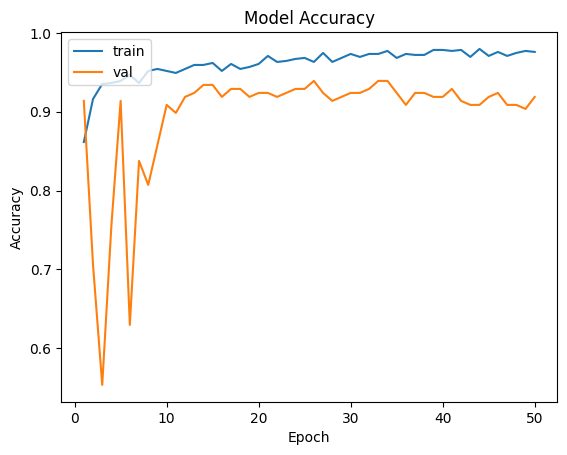

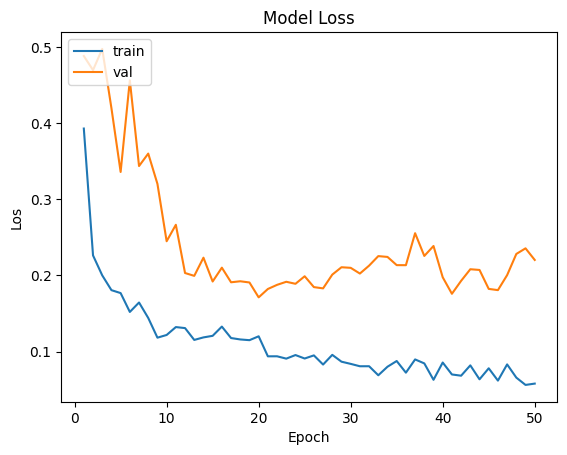

In [28]:
plot_lr(history , epochs)

In [29]:
epochs = 50
model = Sequential()
model.add(Conv1D(32,2,activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = Adam(lr = 0.0001), loss = 'binary_crossentropy' , metrics=['accuracy'])
history = model.fit(x_train , y_train , epochs = epochs , validation_data = (x_test , y_test) , verbose = 1)

Epoch 1/50
25/25 [==============================] - 2s 16ms/step - loss: 0.7042 - accuracy: 0.7268 - val_loss: 0.5560 - val_accuracy: 0.8832
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.3274 - accuracy: 0.8780 - val_loss: 0.5201 - val_accuracy: 0.9036
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 0.2665 - accuracy: 0.8907 - val_loss: 0.4933 - val_accuracy: 0.9036
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.2607 - accuracy: 0.9149 - val_loss: 0.4451 - val_accuracy: 0.9137
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2067 - accuracy: 0.9276 - val_loss: 0.3954 - val_accuracy: 0.9188
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2093 - accuracy: 0.9314 - val_loss: 0.3538 - val_accuracy: 0.9188
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2388 - accuracy: 0.9225 - val_loss: 0.3081 - val_accuracy: 0.9239
Epoch 8/50
25/25 [=

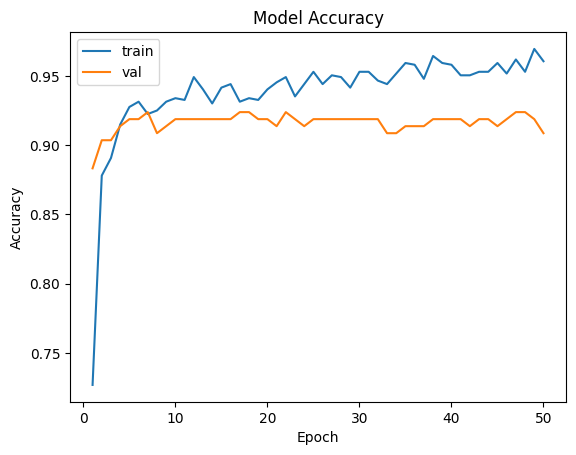

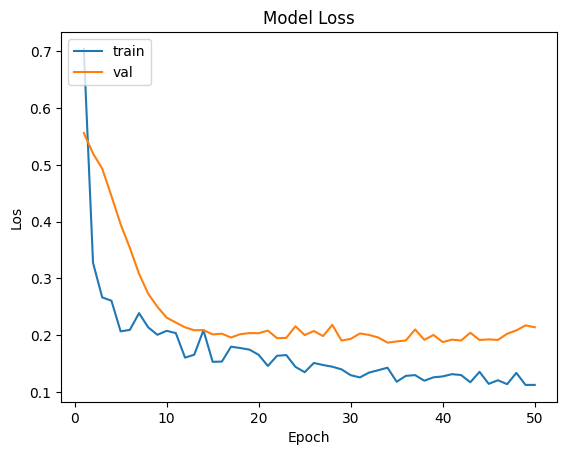

In [30]:
plot_lr(history,epochs)

In [31]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_prob = np.argmax(x_test, axis=1)

7/7 [==============================] - 0s 2ms/step


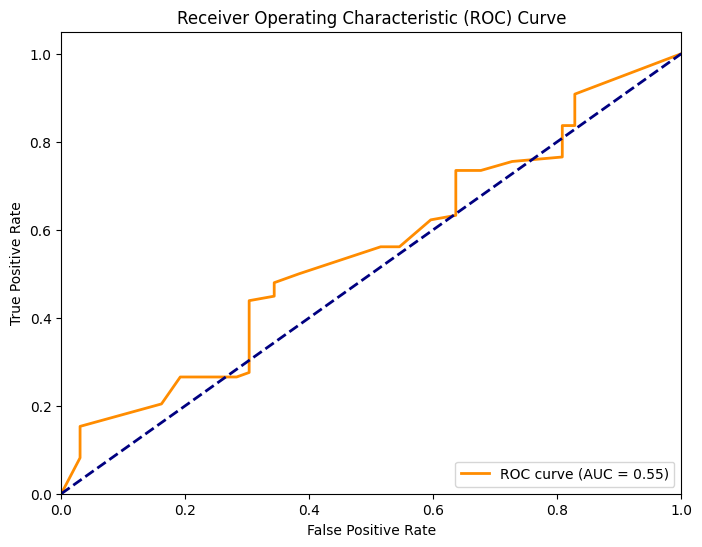

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

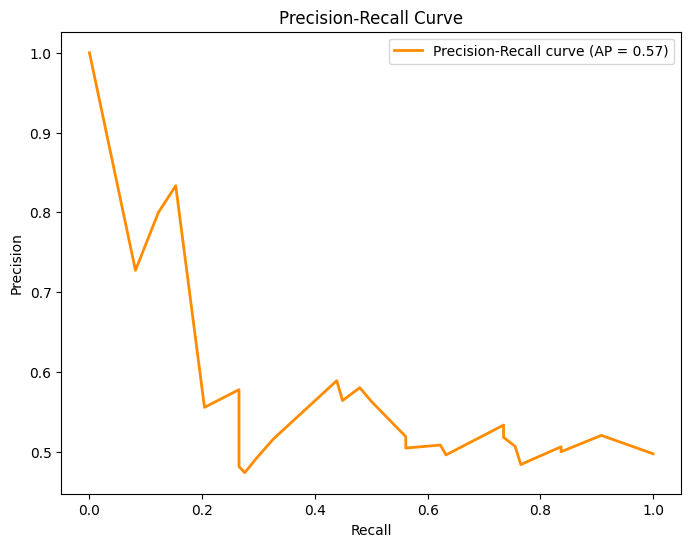

In [33]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
# Calculate Average Precision (AP)
average_precision = average_precision_score(y_test, y_prob)
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

7/7 [==============================] - 0s 2ms/step


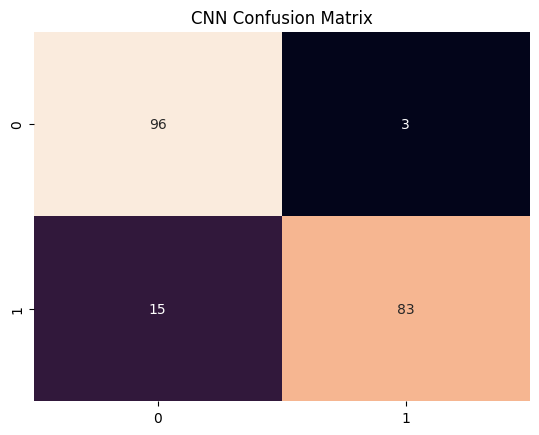

In [34]:
from sklearn.metrics import confusion_matrix
model_predictions = (model.predict(x_test) > 0.5).astype("int32")
confusion_matrix = confusion_matrix(y_test, model_predictions)
sns.heatmap(confusion_matrix, annot=True, fmt="d", cbar = False)
plt.title("CNN Confusion Matrix")
plt.show()

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model_predictions)

0.9086294416243654

In [36]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, model_predictions)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.86486486 0.96511628]
recall: [0.96969697 0.84693878]
fscore: [0.91428571 0.90217391]
support: [99 98]
